# K-means clustering

## import library

In [333]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [356]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

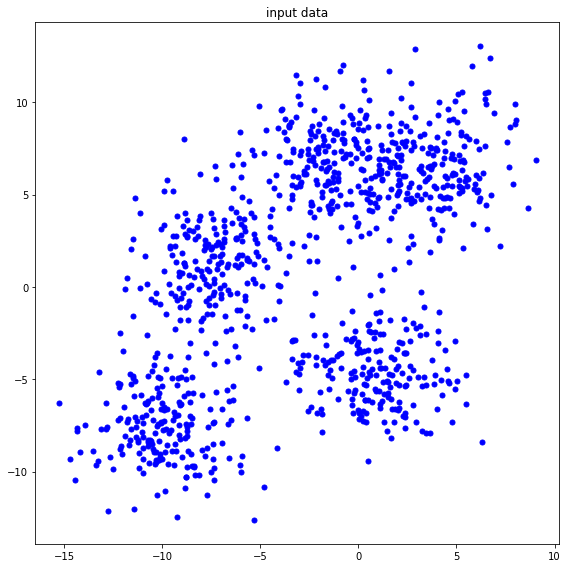

In [357]:
plt.figure(figsize=(8,8))   
plt.title('input data')
plt.scatter(x, y, color='blue', s=25, marker='o')

plt.axis('auto')
plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [359]:
def compute_distance(feature, center):
    distance =(feature - center) ** 2
    distance = distance[:, 0] + distance[:, 1]
    #print(distance.shape)
    #distance = np.sqrt(distance[:, 0] + distance[:, 1])
    return distance 

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [360]:
def compute_centroid(feature, label_feature, value_label, before_centroid):
    centroid = before_centroid
    cluster_k = np.where(label_feature == value_label)
 
    cluster_k_feature = feature[cluster_k]
    #print(cluster_k_feature)

    #print(len(cluster_k_feature))
    if len(cluster_k_feature) !=0:
        centroid = cluster_k_feature.sum(axis=0) / len(cluster_k_feature)
    return centroid
    
#compute_centroid(np.array([[1,2],[3,4], [4,5]]), np.array([1,2,2]), 2)

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [361]:
def compute_label(distance):
    index_label_feature = np.argmin(distance, axis=1)
    #print(index_label_feature)
    return index_label_feature

In [362]:
def compute_loss(feature, cluster_label_for_feature, label_cluster, centroid):
    loss = 0
    for i in range(len(label_cluster)):
        index = np.where(cluster_label_for_feature == i)
        loss = loss + np.sum(compute_distance(feature[index], centroid[i]))
    return loss / cluster_label_for_feature.shape[0]
    


In [375]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 10
number_iteration    = 100
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
label_cluster = np.arange(0,number_cluster,1)

cluster_label_for_feature = np.zeros(number_data)
for i in range(number_data):
    cluster_label_for_feature[i] = np.random.randint(number_cluster)

# ===================================================

In [376]:

for i in range(number_iteration):

    for k in range(number_cluster):
        centroid[k] = compute_centroid(feature, cluster_label_for_feature, k, centroid[k])
        #print(centroid[k])
        distance[:,k] = compute_distance(feature, centroid[k])

    cluster_label_for_feature = compute_label(distance)
    #print(distance)
    loss = compute_loss(feature, cluster_label_for_feature,label_cluster, centroid)
    loss_iteration[i] = loss
    centroid_iteration[i] = centroid
#print(cluster_label_for_feature)
#print(centroid)


## plot the results

In [366]:
def plot_data(feature):
    fx = feature[:,0]
    fy = feature[:,1]
    plt.figure(figsize=(8,8))
    plt.title('input data')
    plt.scatter(fx, fy, color='blue', s=25, marker='o')

    plt.axis('auto')
    plt.tight_layout()
    plt.show()

In [367]:
def plot_loss_curve(loss_iteration):
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure

    plt.title('loss')

    plt.plot(range(0, len(loss_iteration)), loss_iteration, '-', color='red')

    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.tight_layout()
    plt.show()

In [368]:

def plot_centroid(centroid_iteration):
    # centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    colordata= {
    0: 'red', 1: 'blue', 2:'green', 3:'orange', 4:'purple', 5:'black', 6:'cyan', 7:'pink', 8: 'magenta', 9: 'yellow'

    }
    

    for i in range(centroid_iteration.shape[1]):
        label_ = r"${cluster=" + str(i) + "}$"
        plt.plot(centroid_iteration[:, i, 0], centroid_iteration[:, i, 1], '-', color=colordata[i], label=label_)
    plt.plot(centroid_iteration[0, : ,0], centroid_iteration[0, : , 1], 'o',color='blue',label='initial')    
    plt.plot(centroid_iteration[len(centroid_iteration)-1, : ,0], centroid_iteration[len(centroid_iteration)-1, : , 1], 's',color='red',label='final')   
    
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

In [369]:
def plot_cluster(feature, label_feature, label_cluster):
    fx = feature[:,0]
    fy = feature[:,1]

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')

    colordata= {
    0: 'red', 1: 'blue', 2:'green', 3:'orange', 4:'purple', 5:'black', 6:'cyan', 7:'pink', 8: 'magenta', 9: 'yellow'
    }

    cmap = plt.cm.rainbow
    t = plt.scatter(fx,fy, c=label_feature,cmap=plt.cm.get_cmap('rainbow', len(label_cluster)))
    #for i in range(len(label_cluster)):
    #    clu_where = np.where(label_feature == i)
    #    t = plt.scatter(fx[clu_where], fy[clu_where], color=colordata[i] ,s=15)
    #    tlist.append(t)
    
    plt.colorbar(t, ticks=np.linspace(0,9,10))
    plt.tight_layout()


    plt.show()


***

# results

***

1. plot the input data

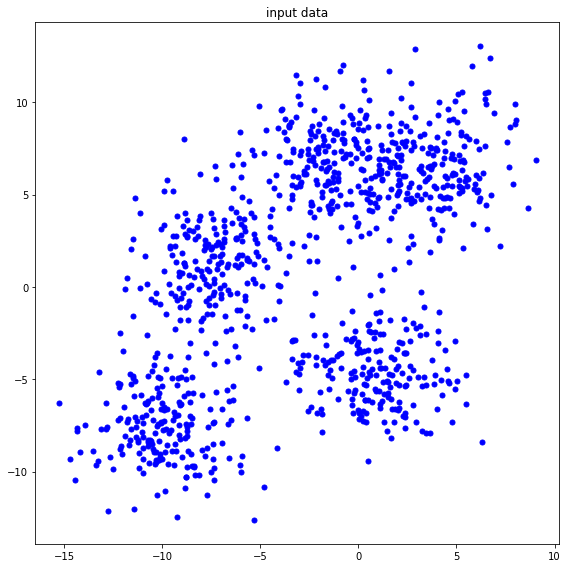

In [371]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

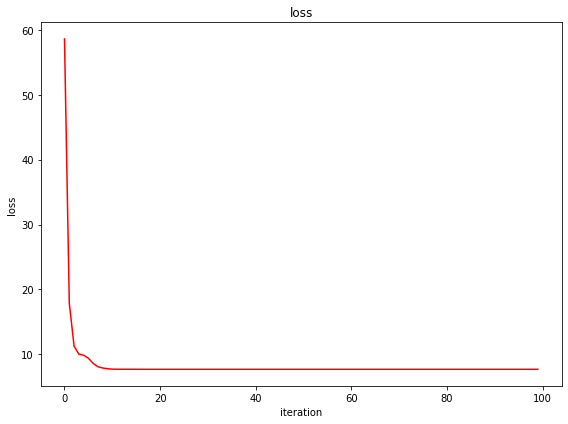

In [372]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

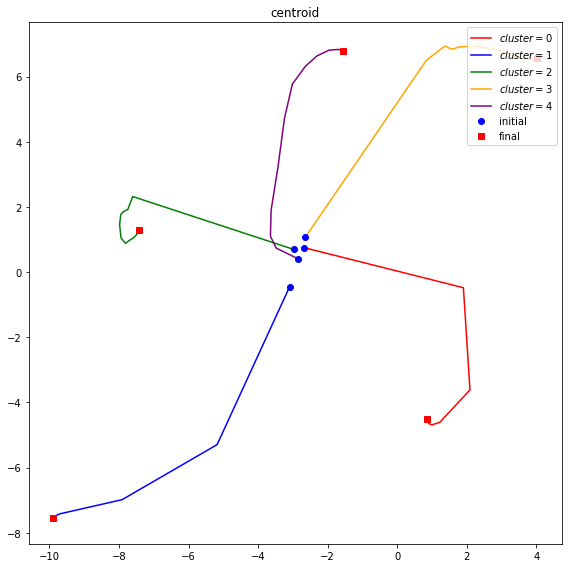

In [373]:
plot_centroid(centroid_iteration)

4. plot the final clustering result with the number of clusters being 5

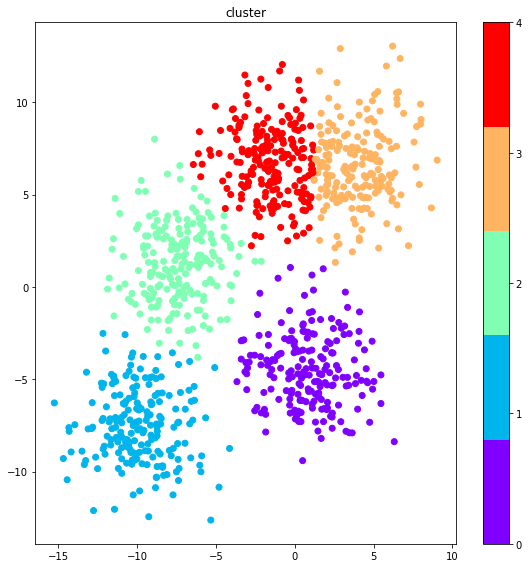

In [374]:
plot_cluster(feature, cluster_label_for_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

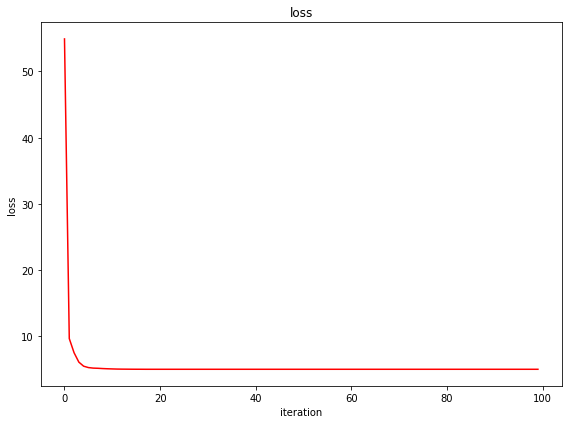

In [377]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

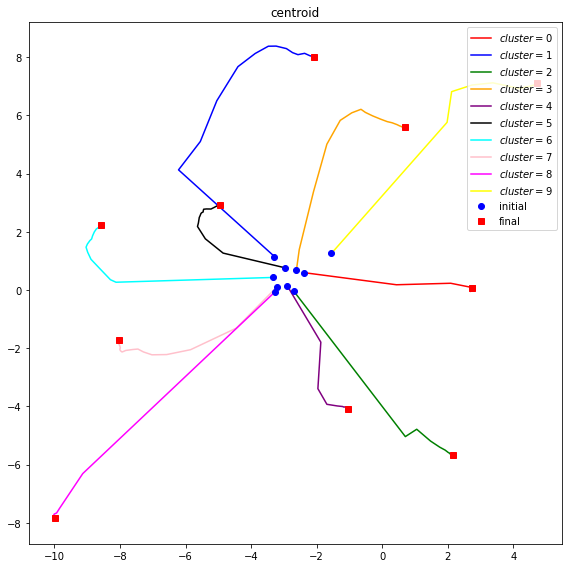

In [378]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

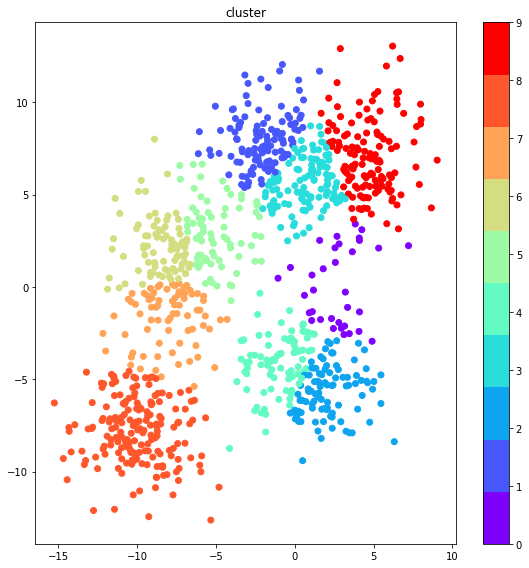

In [379]:
plot_cluster(feature, cluster_label_for_feature, label_cluster)

***